# PCA on Heart Failure Clinical Records

This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 12 clinical features and 1 target.

[Dataset link](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [119]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [121]:
# Separate the features and the target variable.
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

In [122]:
X.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  
count         299.00000    299.000000  299.000000  299.00000  299.000000  
mean            1.39388    136.625418    0.648829    0.32107  130.260870  
std             1.03451      4.412477    0.478136    0.46767   77.614208  
min             0.50000    113.000000    0.000000    0.00000    4.000000  
25%             0.90000    134.000000    0.000000    0.00000   73.000000  
50%             1.10000    137.000000    1.000000    0.00000  115.000000  
75%             1.40000    140.000000    1.000000    1.00000  203.000000  
max             9.40000    148.000000    1.000000    1.00000  285.000000

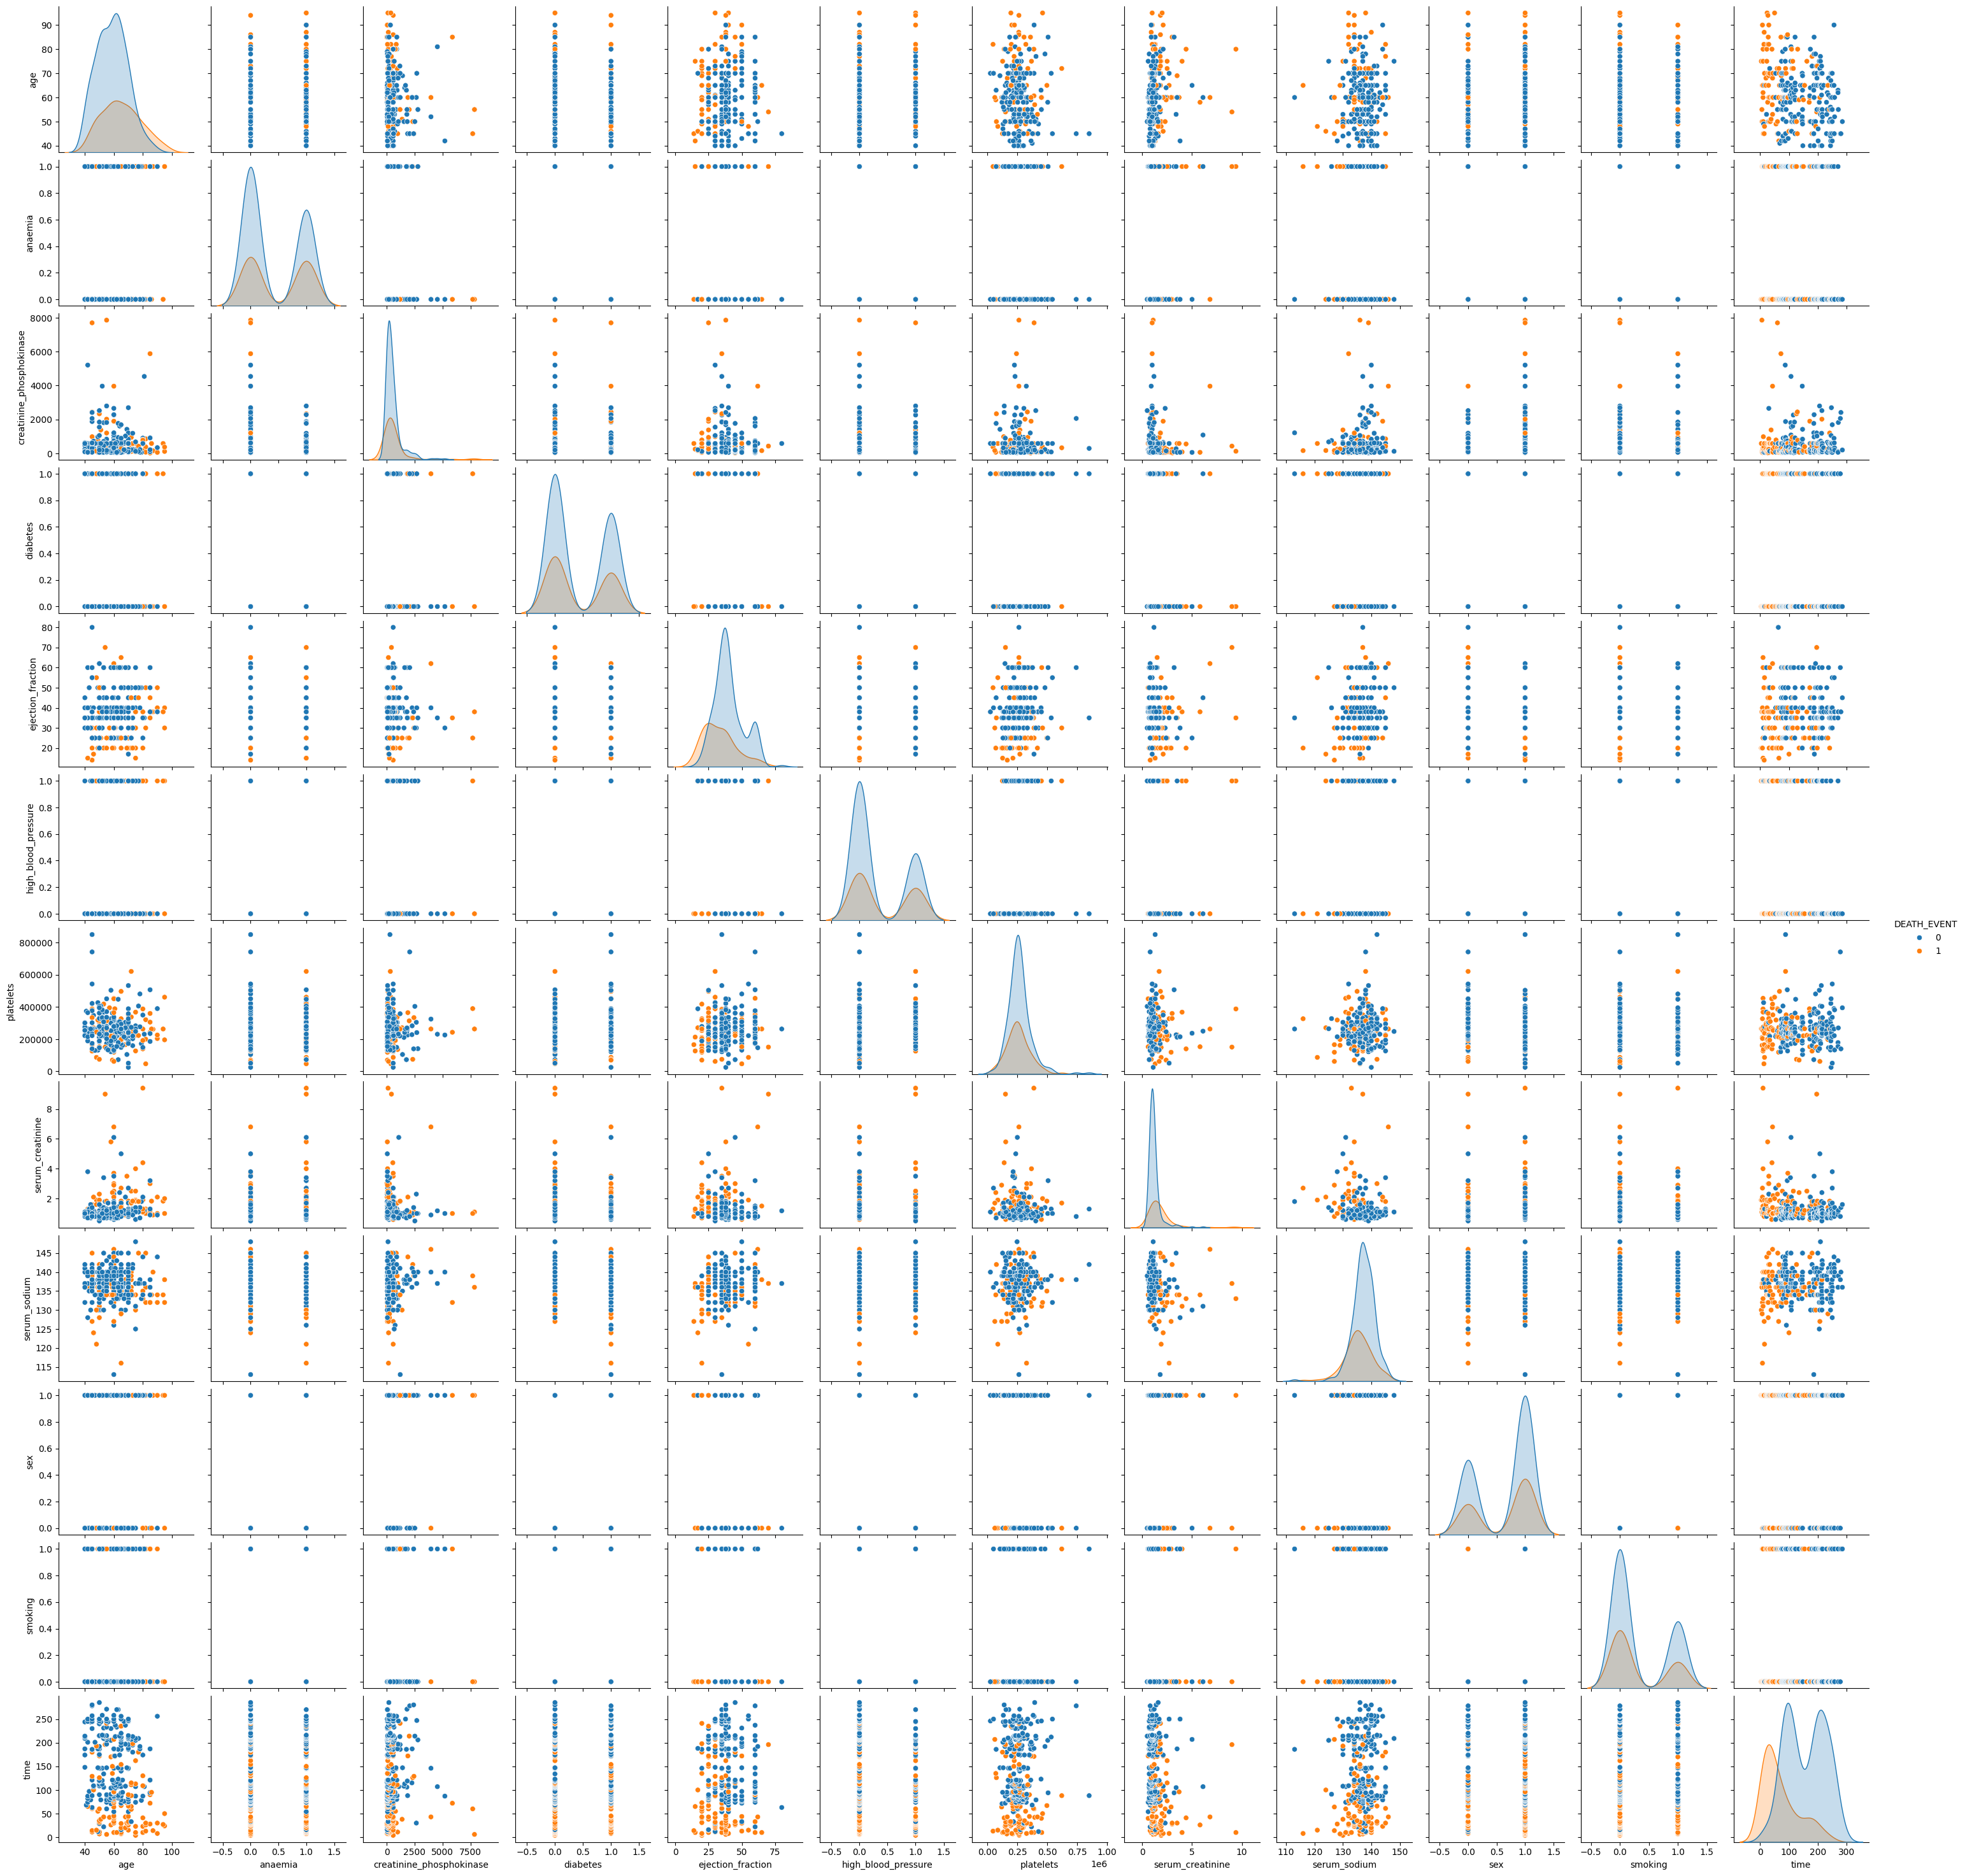

In [123]:
# Pairplot
import seaborn as sns
sns.pairplot(df, hue="DEATH_EVENT")


In [124]:
# Mean value of all the features
X.mean(axis=0)

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
dtype: float64

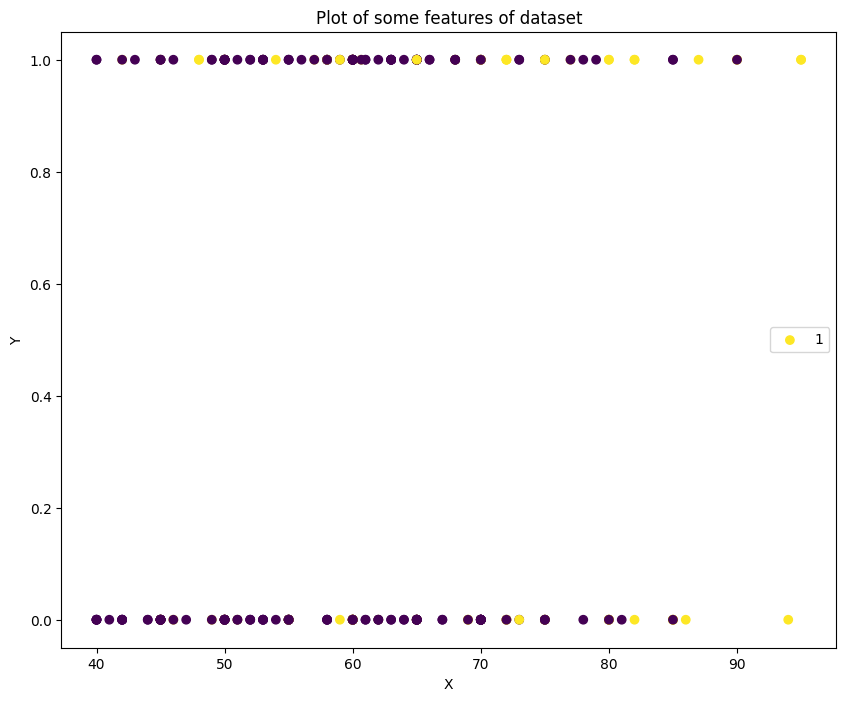

In [125]:
# Plot the data values 
plt.figure(figsize=(10,8))
plt.title("Plot of some features of dataset")
plt.scatter(X["age"], X["anaemia"], c=y)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(y)
plt.show()

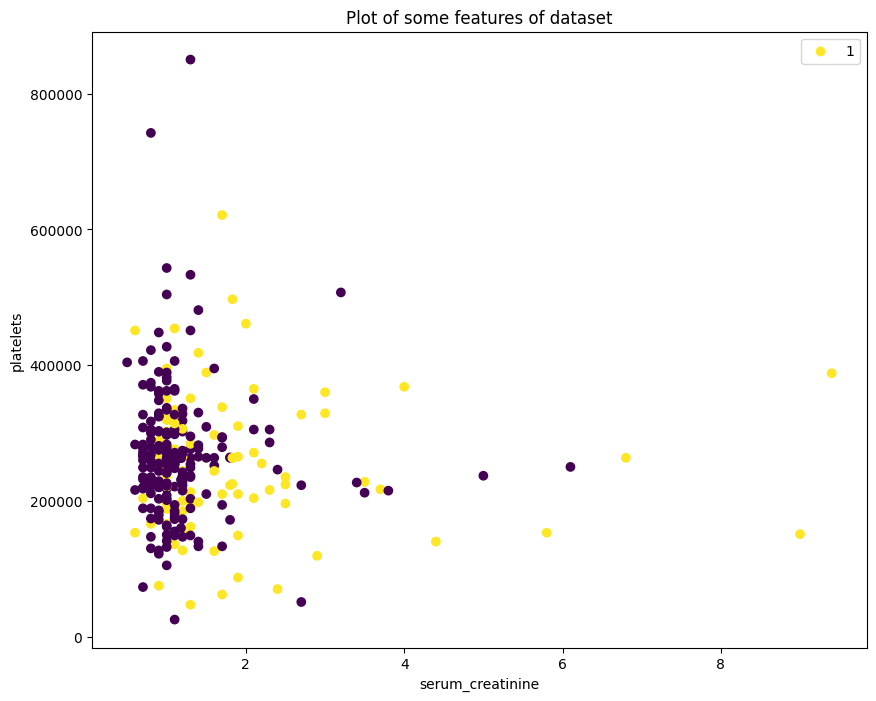

In [126]:
# Plot the data values 
plt.figure(figsize=(10,8))
plt.title("Plot of some features of dataset")
plt.scatter(X["serum_creatinine"], X["platelets"], c=y)
plt.xlabel("serum_creatinine")
plt.ylabel("platelets")
plt.legend(y)
plt.show()

In [127]:
# Subtract the mean value from each feature.
X = X - X.mean()
X.head()

age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  14.166107 -0.431438                  0.160535  -0.41806         -18.083612   
1  -5.833893 -0.431438               7279.160535  -0.41806          -0.083612   
2   4.166107 -0.431438               -435.839465  -0.41806         -18.083612   
3 -10.833893  0.568562               -470.839465  -0.41806         -18.083612   
4   4.166107  0.568562               -421.839465   0.58194         -18.083612   

   high_blood_pressure      platelets  serum_creatinine  serum_sodium  \
0             0.648829    1641.970736           0.50612     -6.625418   
1            -0.351171       0.000736          -0.29388     -0.625418   
2            -0.351171 -101358.029264          -0.09388     -7.625418   
3            -0.351171  -53358.029264           0.50612      0.374582   
4            -0.351171   63641.970736           1.30612    -20.625418   

        sex  smoking       time  
0  0.351171 -0.32107 -126.26087  
1  0.351171 -0.32107 -124.26087  
2  0.351171  0.67893 -123.26087  
3  0.351171 -0.32107 -123.26087  
4 -0.648829 -0.32107 -122.26087

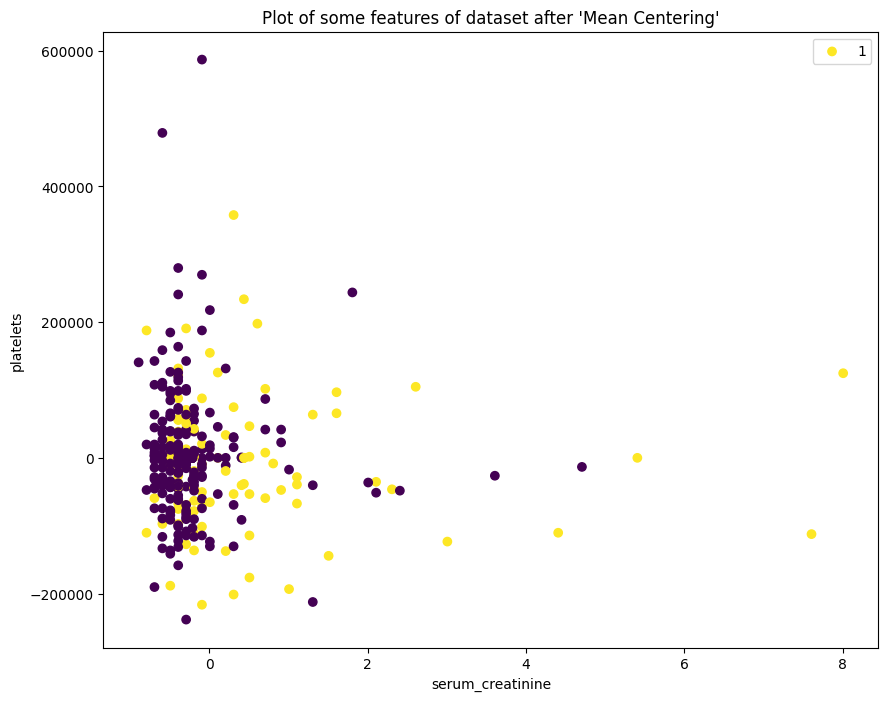

In [128]:
# Plot the data values 
plt.figure(figsize=(10,8))
plt.title("Plot of some features of dataset after 'Mean Centering'")
plt.scatter(X["serum_creatinine"], X["platelets"], c=y)
plt.xlabel("serum_creatinine")
plt.ylabel("platelets")
plt.legend(y)
plt.show()

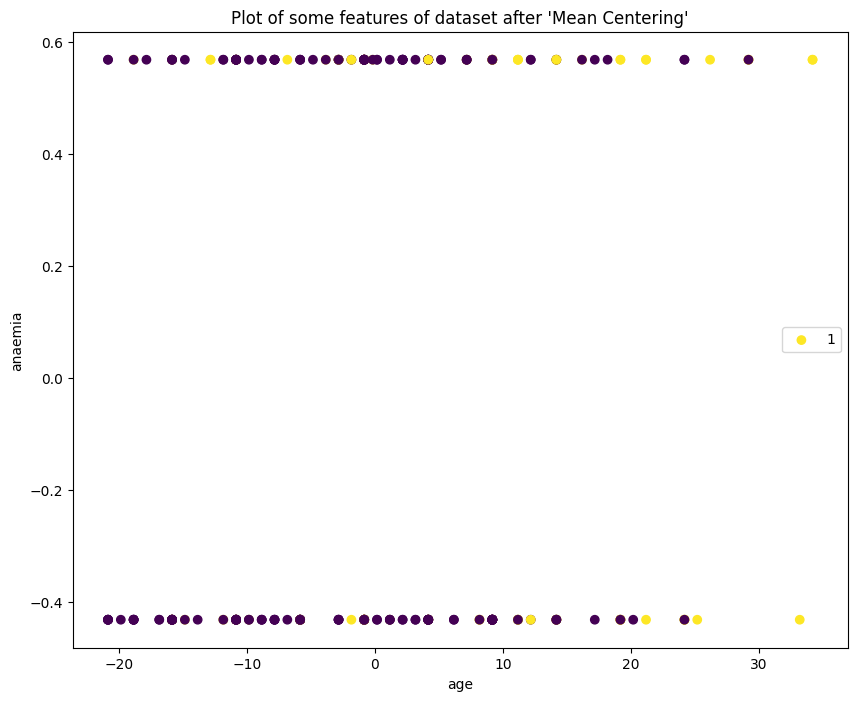

In [129]:
# Plot the data values 
plt.figure(figsize=(10,8))
plt.title("Plot of some features of dataset after 'Mean Centering'")
plt.scatter(X["age"], X["anaemia"], c=y)
plt.xlabel("age")
plt.ylabel("anaemia")
plt.legend(y)
plt.show()

In [130]:
variance = np.var(X)
variance

c:\Users\ghimi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


age                         1.410133e+02
anaemia                     2.452993e-01
creatinine_phosphokinase    9.383099e+05
diabetes                    2.432859e-01
ejection_fraction           1.395950e+02
high_blood_pressure         2.278498e-01
platelets                   9.533677e+09
serum_creatinine            1.066632e+00
serum_sodium                1.940484e+01
sex                         2.278498e-01
smoking                     2.179841e-01
time                        6.003818e+03
dtype: float64

In [131]:
# Compute the covariance matrix.
# X = X.transpose() # This makes 299 by 299 covariance matrix.
cov_matrix = np.cov(X, rowvar=False) # It disables the assumption that row contains variables or features.
cov_matrix.shape # There are 12 features

(12, 12)

In [132]:
matrix = pd.DataFrame(cov_matrix) 
matrix

0            1             2            3             4   \
0     141.486483     0.519335 -9.415915e+02    -0.593633      8.460237   
1       0.519335     0.246122 -9.181641e+01    -0.003120      0.185282   
2    -941.591531   -91.816413  9.414586e+05    -4.620581   -506.174452   
3      -0.593633    -0.003120 -4.620581e+00     0.244102     -0.028361   
4       8.460237     0.185282 -5.061745e+02    -0.028361    140.063455   
5       0.530565     0.009057 -3.274880e+01    -0.003008      0.138325   
6  -60907.118586 -2124.535856  2.321533e+06  4454.928228  83545.241001   
7       1.958845     0.026777 -1.647038e+01    -0.024010     -0.138379   
8      -2.412544     0.091681  2.549564e+02    -0.195226      9.185787   
9       0.372120    -0.022480  3.701726e+01    -0.037261     -0.839667   
10      0.103847    -0.024893  1.098696e+00    -0.034006     -0.372573   
11   -206.861351    -5.445142 -7.038036e+02     1.293259     38.330464   

             5             6            7             8            9   \
0      0.530565 -6.090712e+04     1.958845     -2.412544     0.372120   
1      0.009057 -2.124536e+03     0.026777      0.091681    -0.022480   
2    -32.748805  2.321533e+06   -16.470382    254.956443    37.017261   
3     -0.003008  4.454928e+03    -0.024010     -0.195226    -0.037261   
4      0.138325  8.354524e+04    -0.138379      9.185787    -0.839667   
5      0.228614  2.336480e+03    -0.002441      0.078292    -0.023916   
6   2336.480427  9.565669e+09 -4168.399498  26810.436905 -5851.104689   
7     -0.002441 -4.168399e+03     1.070211     -0.863173     0.003448   
8      0.078292  2.681044e+04    -0.863173     19.469956    -0.058158   
9     -0.023916 -5.851105e+03     0.003448     -0.058158     0.228614   
10    -0.012458  1.291448e+03    -0.013263      0.009932     0.099706   
11    -7.289904  7.981107e+04   -11.988935     30.014152    -0.579224   

             10            11  
0      0.103847   -206.861351  
1     -0.024893     -5.445142  
2      1.098696   -703.803618  
3     -0.034006      1.293259  
4     -0.372573     38.330464  
5     -0.012458     -7.289904  
6   1291.447854  79811.066099  
7     -0.013263    -11.988935  
8      0.009932     30.014152  
9      0.099706     -0.579224  
10     0.218716     -0.829005  
11    -0.829005   6023.965276

In [133]:
# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors 
# eigenvalues gives variance explained by each principal component 
# eigenvectors gives direction of the principal components.

(array([9.56566931e+09, 9.40896938e+05, 6.03044020e+03, 1.46422466e+02,
        1.26001931e+02, 1.85327728e+01, 9.95200626e-01, 3.48875728e-01,
        1.19154282e-01, 1.95820309e-01, 2.30655887e-01, 2.22953816e-01]),
 array([[-6.36728554e-06, -9.85009516e-04,  3.51252402e-02,
         -5.83112639e-01, -8.11393020e-01, -1.52519999e-02,
          1.10155159e-02,  3.35430279e-03,  1.58298225e-03,
          1.26150804e-03, -3.48475274e-03, -2.19254578e-03],
        [-2.22102402e-07, -9.70319576e-05,  9.13323394e-04,
         -1.98088703e-03, -5.05246837e-04, -7.50776304e-03,
         -2.30923865e-02,  2.37946675e-01,  3.07223172e-02,
         -4.21990037e-01,  7.69316434e-01, -4.14631769e-01],
        [ 2.42718152e-04,  9.99998989e-01, -7.40272579e-04,
         -1.02632574e-03, -5.13977587e-04,  2.92936598e-04,
          4.10652174e-06,  5.66244869e-05,  3.00591283e-05,
         -5.36459926e-05,  7.37563987e-05, -9.48371633e-06],
        [ 4.65720363e-07, -6.06049492e-06, -2.10523956e-04,

In [134]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7, 10, 11,  9,  8], dtype=int64)

In [135]:
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvalues

array([9.56566931e+09, 9.40896938e+05, 6.03044020e+03, 1.46422466e+02,
       1.26001931e+02, 1.85327728e+01, 9.95200626e-01, 3.48875728e-01,
       2.30655887e-01, 2.22953816e-01, 1.95820309e-01, 1.19154282e-01])

In [136]:
sorted_eigenvalues[0]

9565669314.794361

In [137]:
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvectors

array([[-6.36728554e-06, -9.85009516e-04,  3.51252402e-02,
        -5.83112639e-01, -8.11393020e-01, -1.52519999e-02,
         1.10155159e-02,  3.35430279e-03, -3.48475274e-03,
        -2.19254578e-03,  1.26150804e-03,  1.58298225e-03],
       [-2.22102402e-07, -9.70319576e-05,  9.13323394e-04,
        -1.98088703e-03, -5.05246837e-04, -7.50776304e-03,
        -2.30923865e-02,  2.37946675e-01,  7.69316434e-01,
        -4.14631769e-01, -4.21990037e-01,  3.07223172e-02],
       [ 2.42718152e-04,  9.99998989e-01, -7.40272579e-04,
        -1.02632574e-03, -5.13977587e-04,  2.92936598e-04,
         4.10652174e-06,  5.66244869e-05,  7.37563987e-05,
        -9.48371633e-06, -5.36459926e-05,  3.00591283e-05],
       [ 4.65720363e-07, -6.06049492e-06, -2.10523956e-04,
         2.61182248e-03,  2.94758777e-03,  1.16486125e-02,
         2.91705263e-02,  3.74990843e-01, -6.33548578e-01,
        -4.35448375e-01, -5.17047735e-01,  6.50053941e-03],
       [ 8.73384961e-06, -5.59642055e-04, -6.2718375

In [138]:
eigenvalues_sum = np.sum(eigenvalues)
var_of_proportion = sorted_eigenvalues / eigenvalues_sum
var_of_proportion

array([9.99900987e-01, 9.83521116e-05, 6.30362906e-07, 1.53055645e-08,
       1.31710026e-08, 1.93723379e-09, 1.04028485e-10, 3.64680372e-11,
       2.41104978e-11, 2.33053991e-11, 2.04691291e-11, 1.24552167e-11])

In [139]:
num_components = np.argmax(var_of_proportion >= 0.95) + 1
num_components # Only one component

1

In [140]:
for i, value in enumerate(var_of_proportion):
    if value >=0.05:
        print(f"Index: {i}")

Index: 0


In [141]:
transformed_data_1D = np.dot(X, sorted_eigenvectors[:, 0])
transformed_data_1D

array([ 1.64196941e+03,  1.76651776e+00, -1.01358133e+05, -5.33581431e+04,
        6.36418652e+04, -5.93581585e+04, -1.36358108e+05,  1.90641900e+05,
       -1.03171326e-01,  1.24641855e+05,  1.04641845e+05, -1.03581152e+04,
       -1.27357930e+05,  1.26418690e+04,  1.63641843e+05, -2.16358073e+05,
       -1.35813541e+03, -9.73580275e+04, -2.63581405e+04, -1.76358025e+05,
        1.26418407e+04,  3.36418586e+04,  2.56418812e+04,  1.04641841e+05,
       -2.87648253e-04, -1.14358132e+05, -6.73581424e+04,  2.06418576e+04,
       -1.10358154e+05, -6.33581527e+04, -3.05993649e-04,  9.66418313e+04,
        5.56418875e+04,  3.86418661e+04, -7.53581462e+04, -3.53580291e+04,
       -3.73581557e+04,  5.76420345e+04,  4.16424720e+04,  6.56418838e+04,
       -2.77344891e-04, -1.10358138e+05, -7.83580304e+04, -4.53581391e+04,
       -6.93580263e+04,  4.66419687e+04,  7.64216340e+03,  1.87641964e+05,
       -1.23358034e+05,  1.31641856e+05, -9.73580284e+04,  1.54641846e+05,
        8.21158228e-01,  

In [142]:
# For new covariance matrix for reduced dataset, calculate variance
new_cov_matrix = np.var(transformed_data_1D, ddof=1)
new_cov_matrix

9565669314.794348

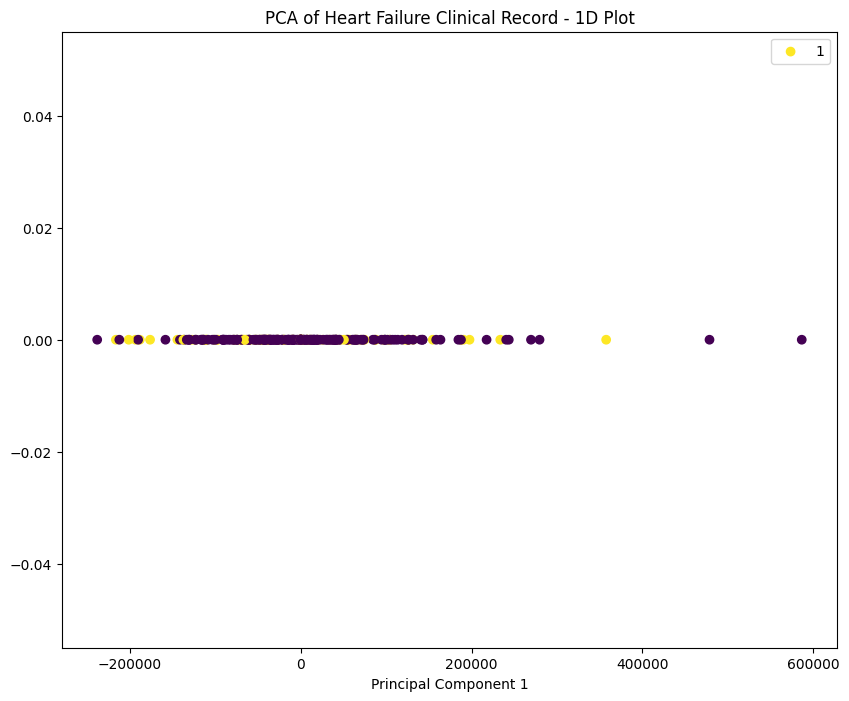

In [143]:
# Plot the data values 
plt.figure(figsize=(10,8))
plt.title("PCA of Heart Failure Clinical Record - 1D Plot")
plt.scatter(transformed_data_1D, np.zeros_like(transformed_data_1D), c=y)
plt.xlabel("Principal Component 1")
plt.legend(y)
plt.show()

In [146]:
PCA = np.dot(X, sorted_eigenvectors)
PCA

array([[ 1.64196941e+03, -1.45905476e-01,  1.26838452e+02, ...,
         7.89416938e-01,  1.79463902e-01, -4.70698845e-01],
       [ 1.76651776e+00,  7.27925497e+03,  1.18588597e+02, ...,
        -7.74948549e-02,  3.47882771e-01, -2.72950543e-01],
       [-1.01358133e+05, -4.11138654e+02,  1.22907106e+02, ...,
        -1.43072664e-02,  4.52701267e-01,  3.09505117e-01],
       ...,
       [ 4.78642317e+05,  1.36187561e+03, -1.45222320e+02, ...,
        -2.25361426e-01,  1.98913044e-01, -8.92071836e-03],
       [-1.23357580e+05,  1.86100016e+03, -1.52656996e+02, ...,
         9.79749080e-02, -1.97037101e-02,  3.35934537e-01],
       [ 1.31641875e+05, -4.17903332e+02, -1.53613577e+02, ...,
         9.22900812e-02,  1.28001514e-01,  1.44464836e-01]])

C:\Users\ghimi\AppData\Local\Temp\ipykernel_19808\85928095.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


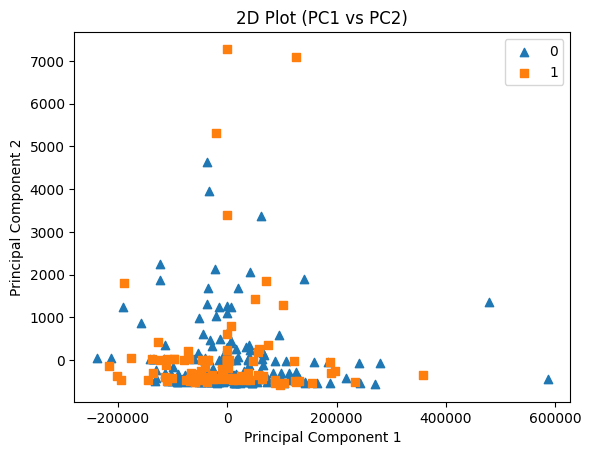

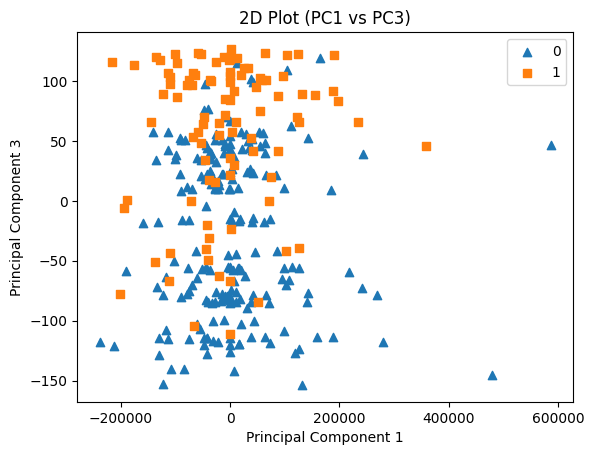

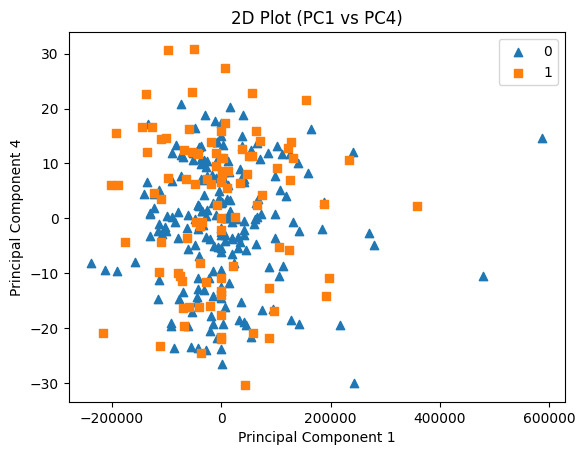

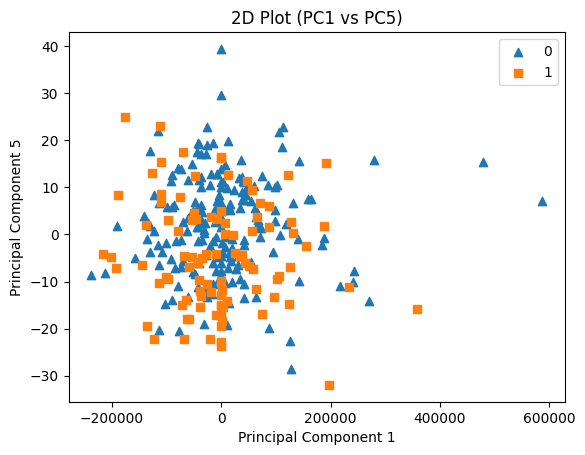

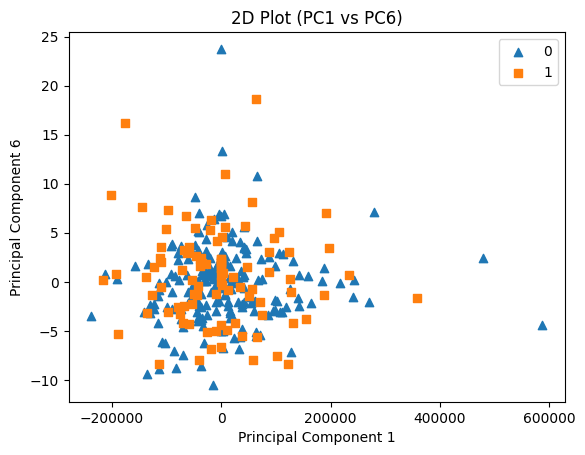

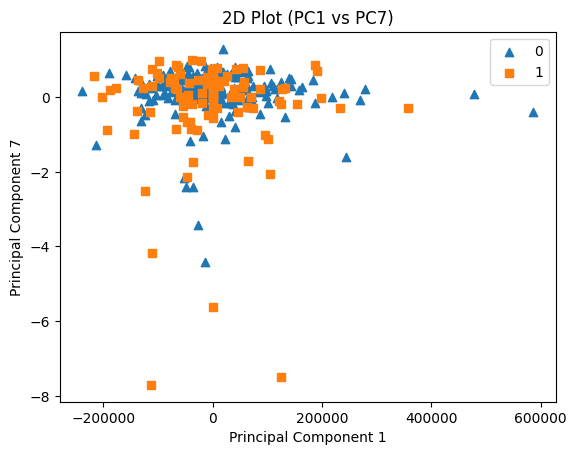

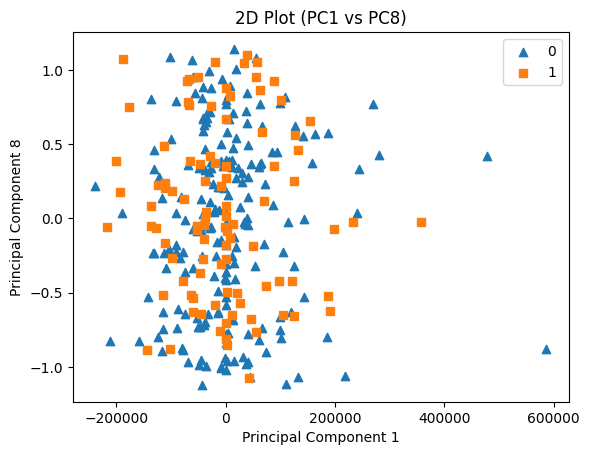

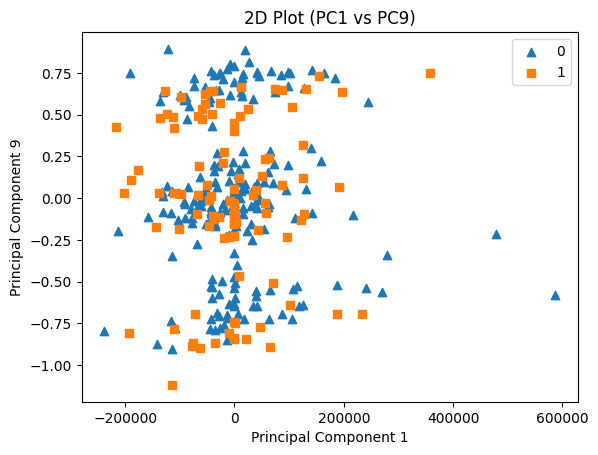

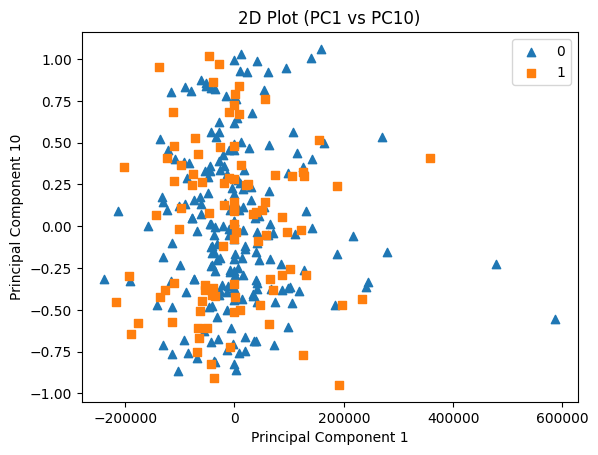

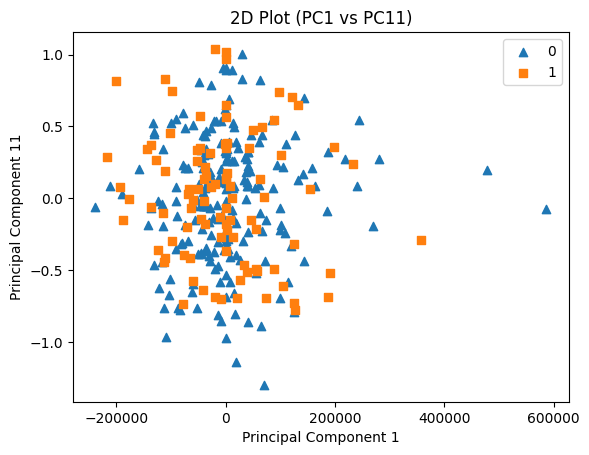

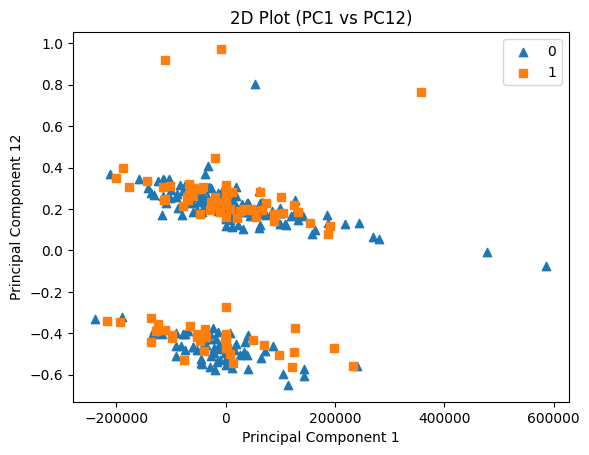

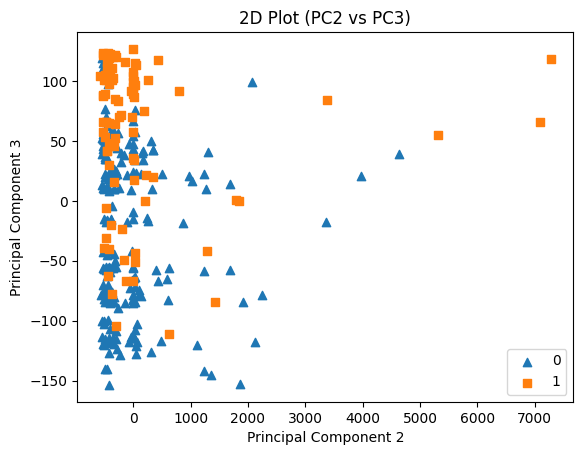

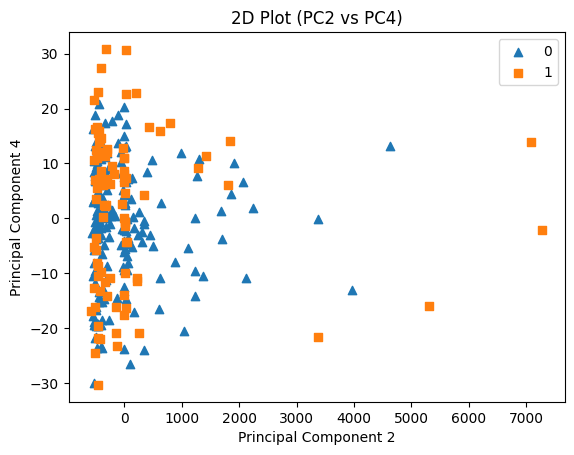

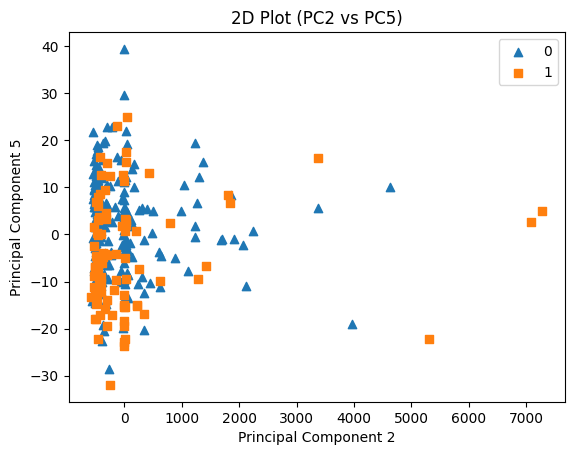

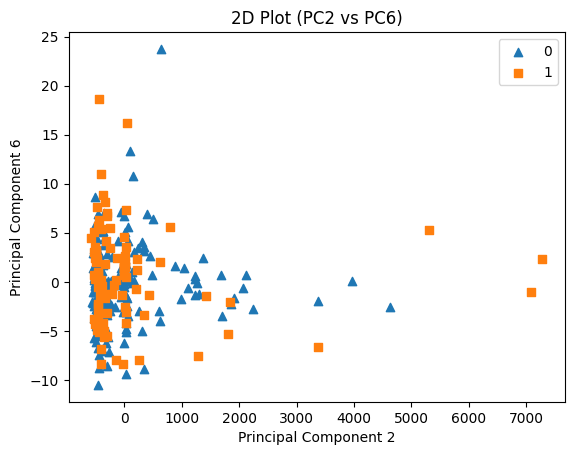

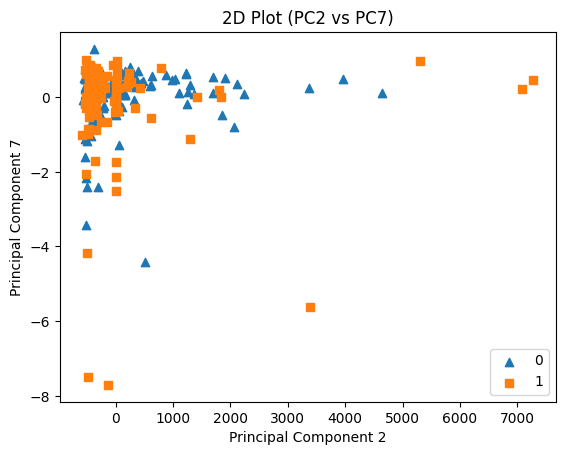

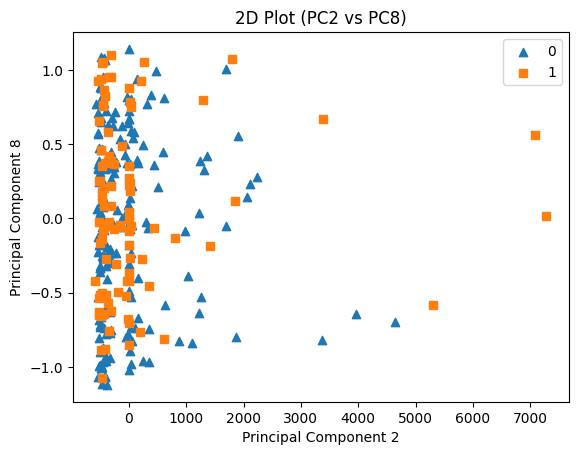

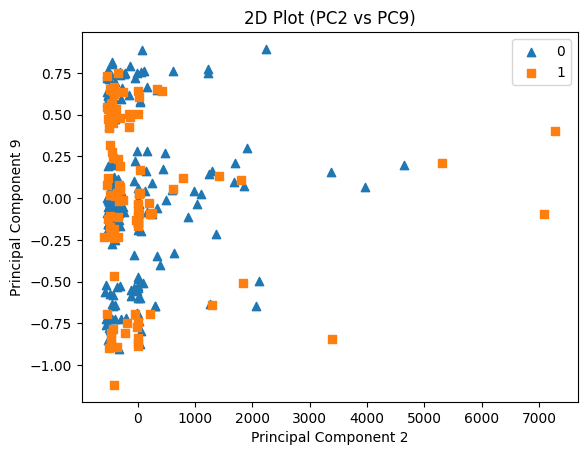

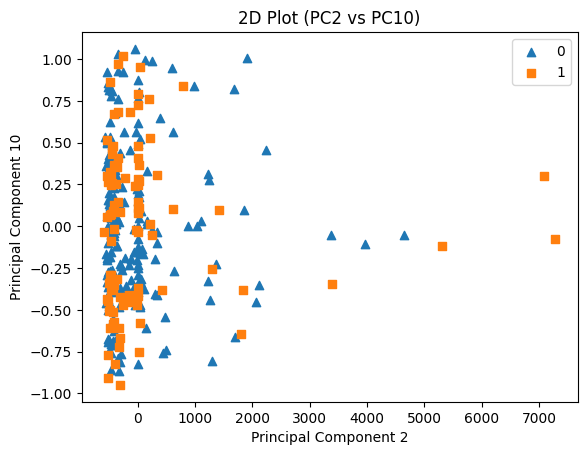

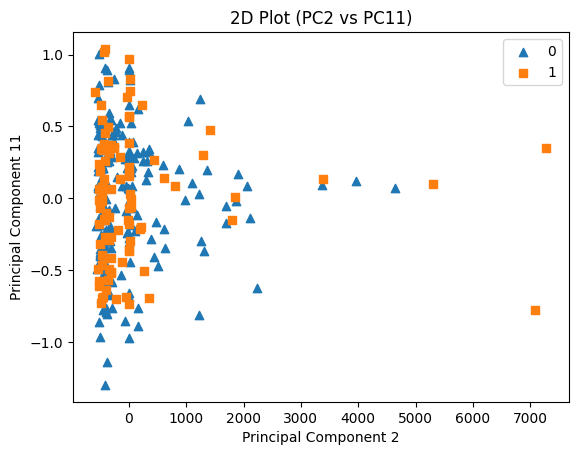

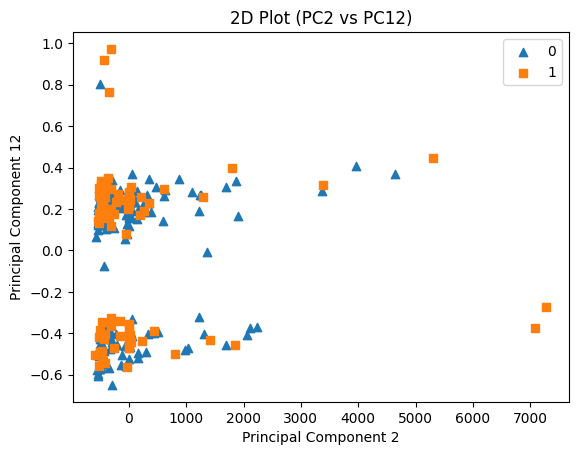

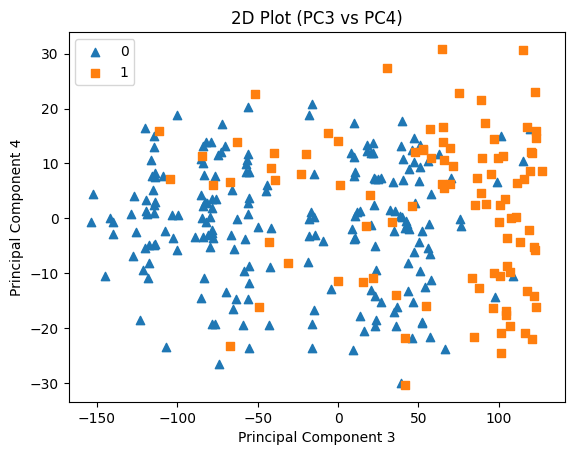

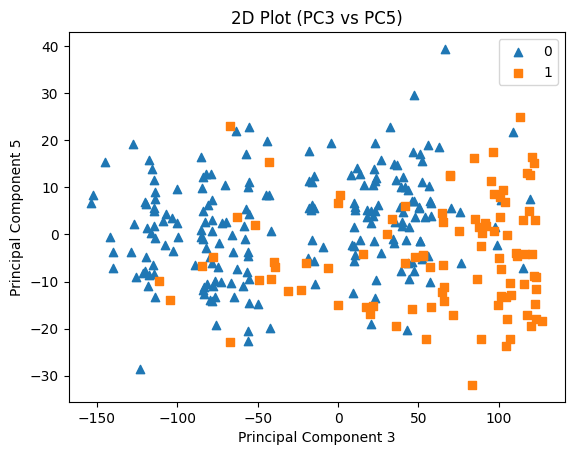

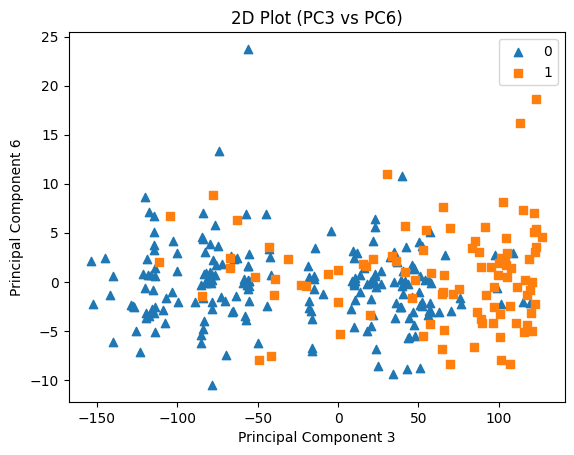

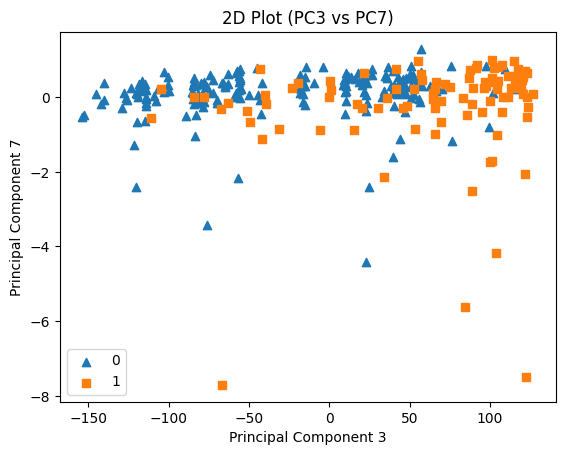

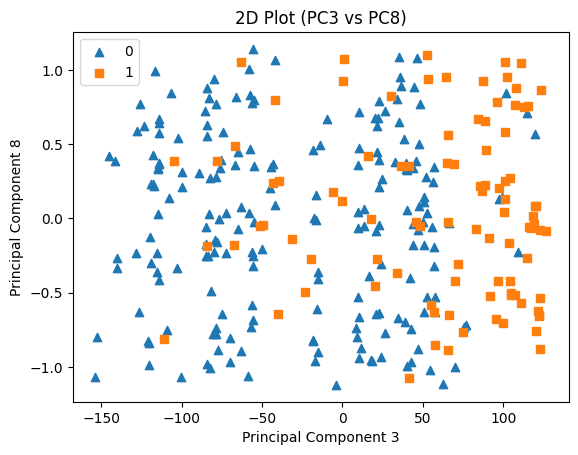

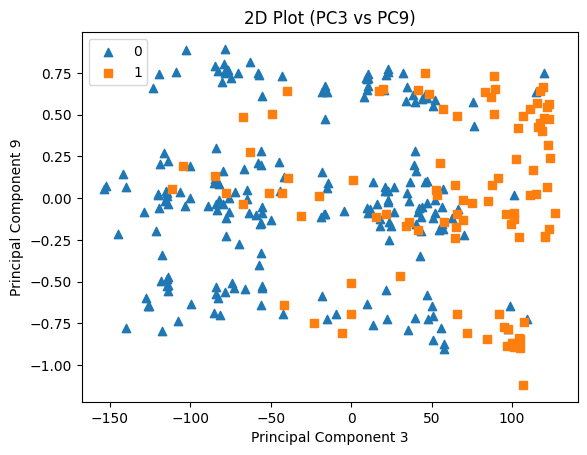

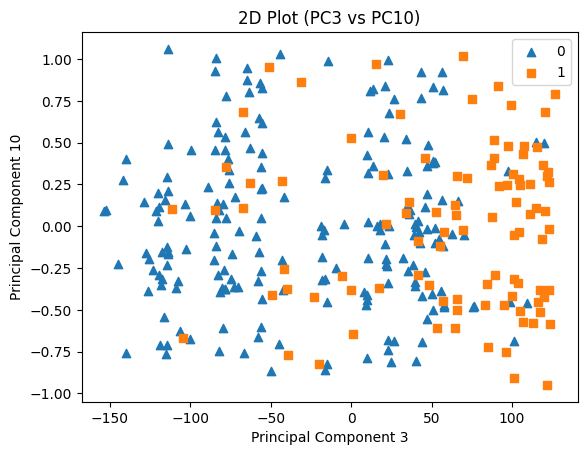

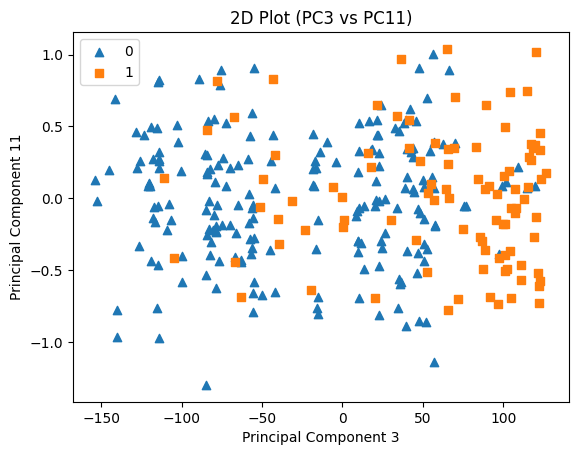

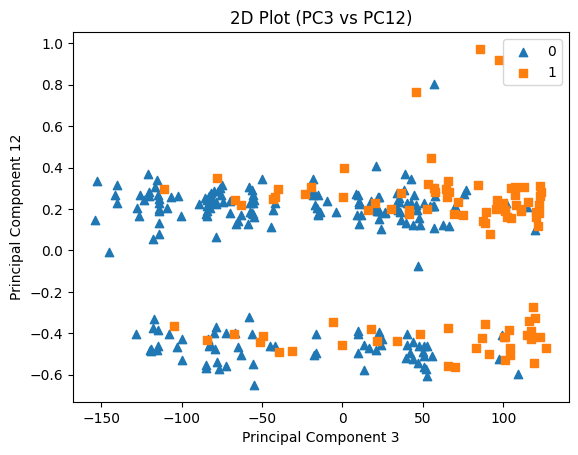

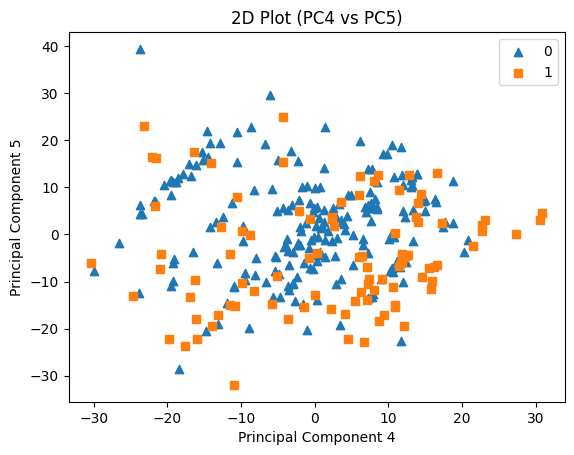

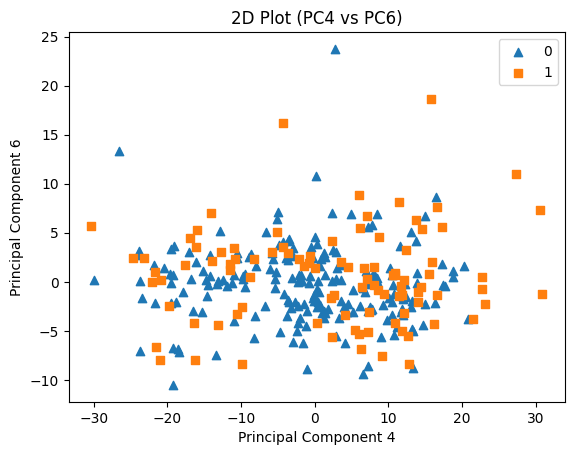

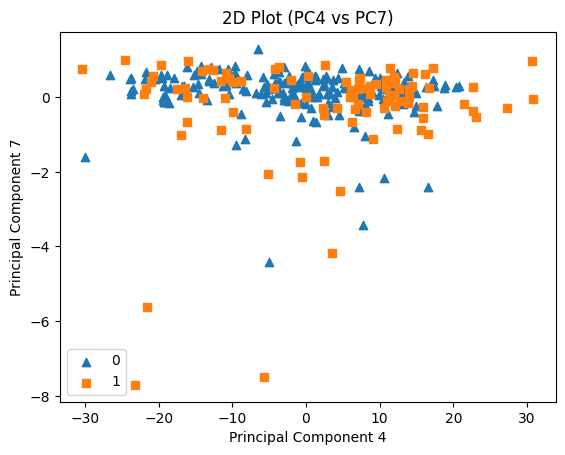

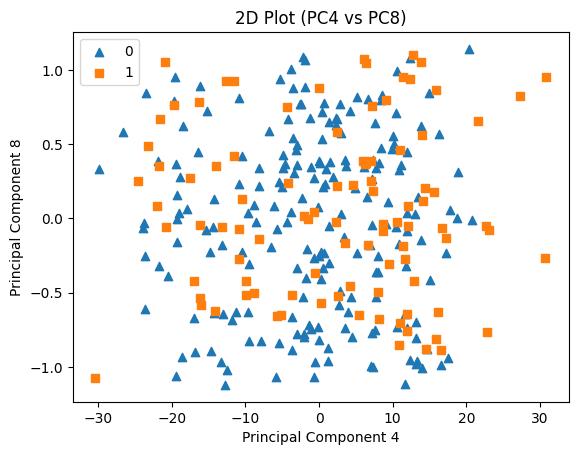

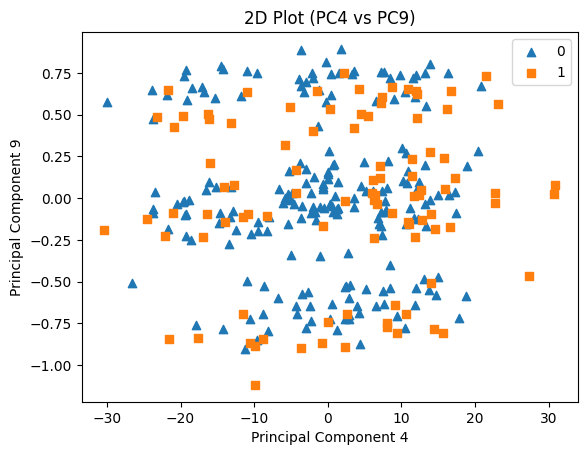

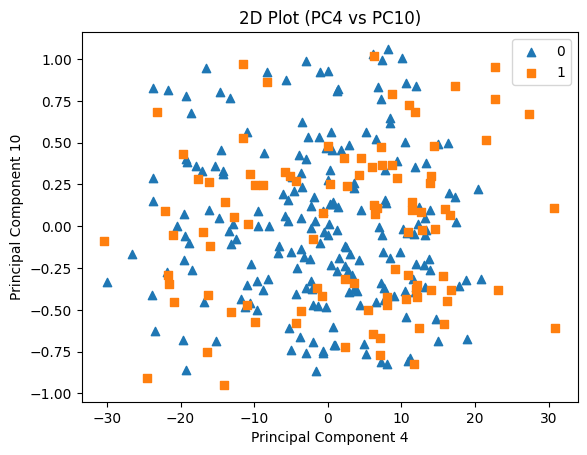

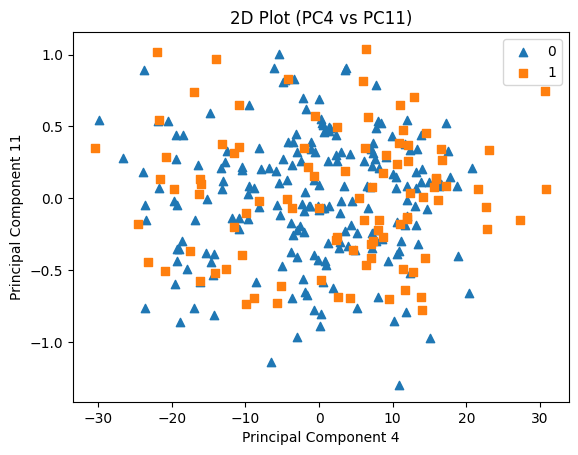

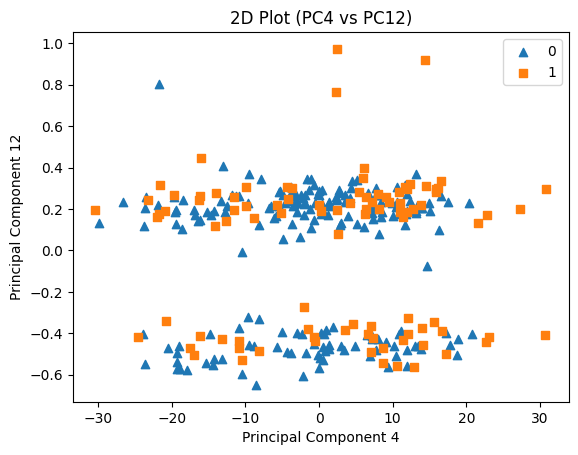

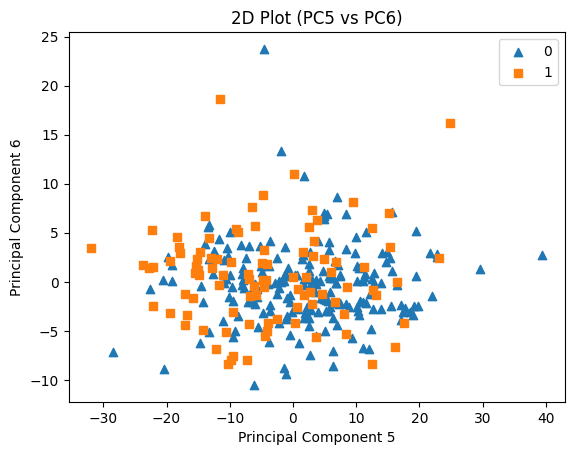

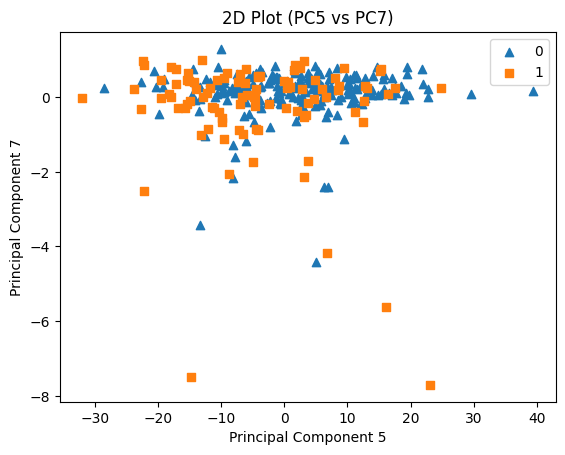

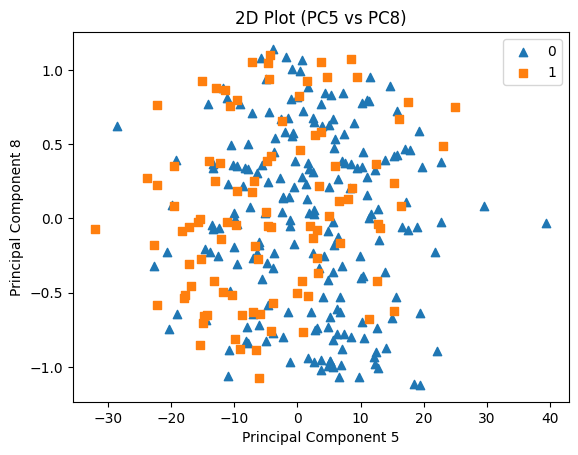

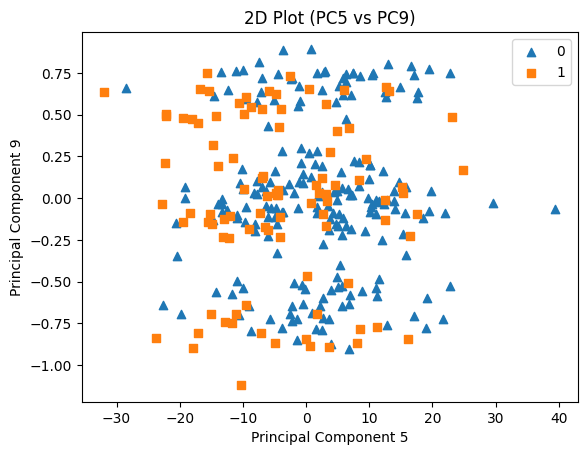

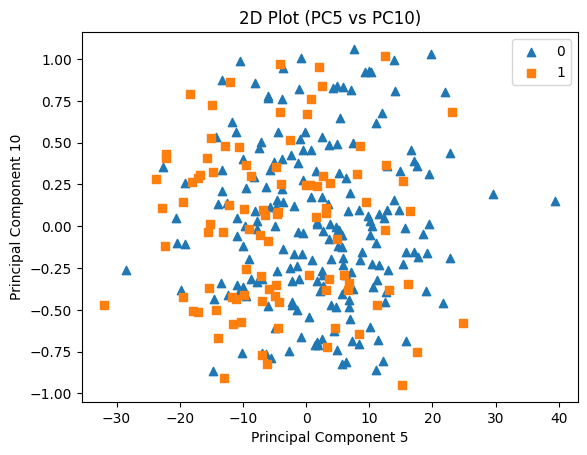

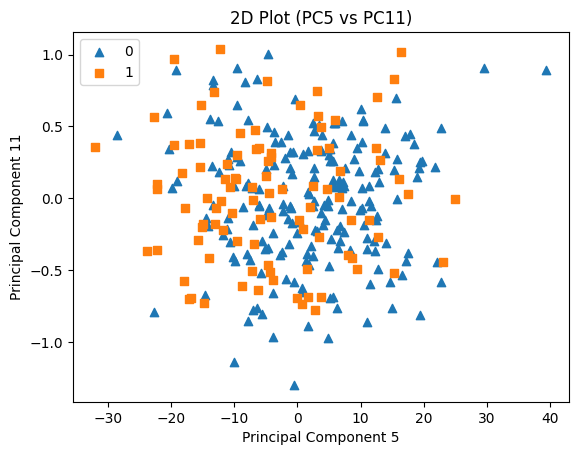

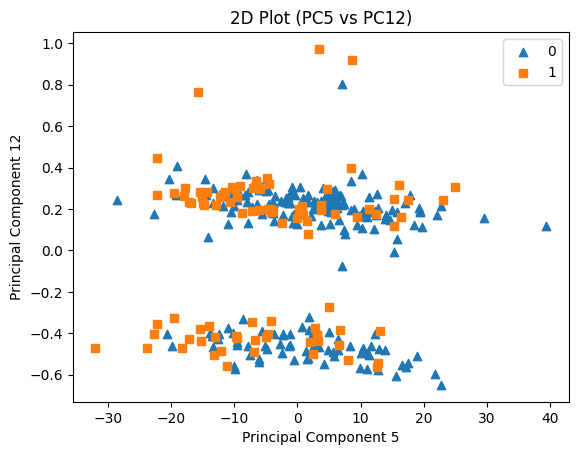

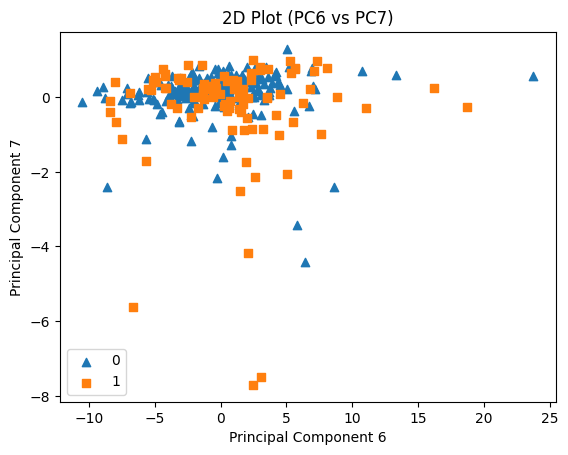

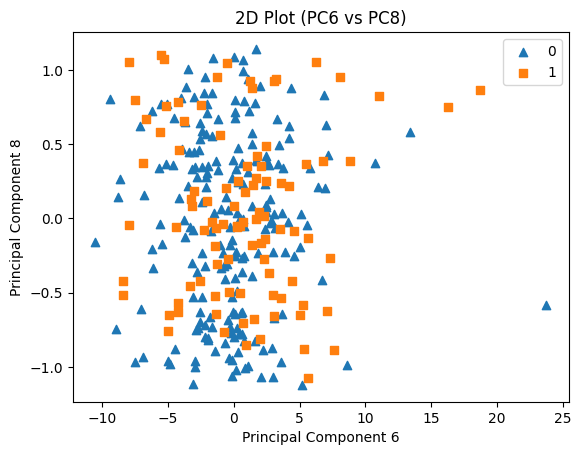

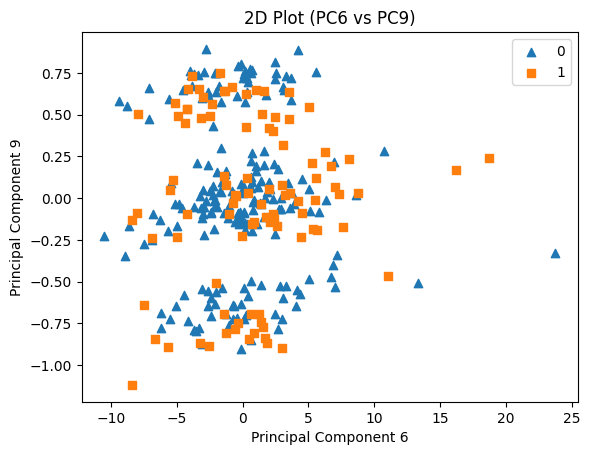

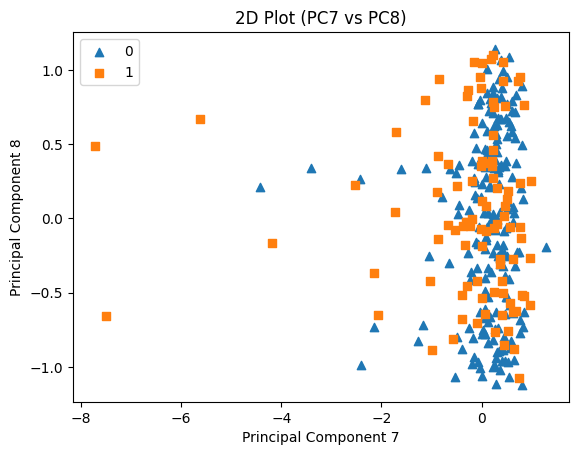

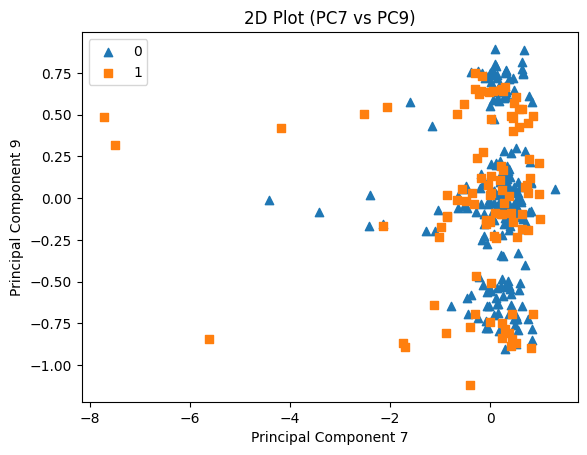

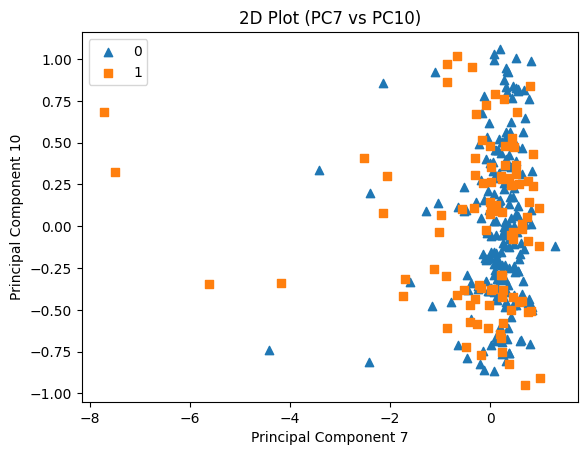

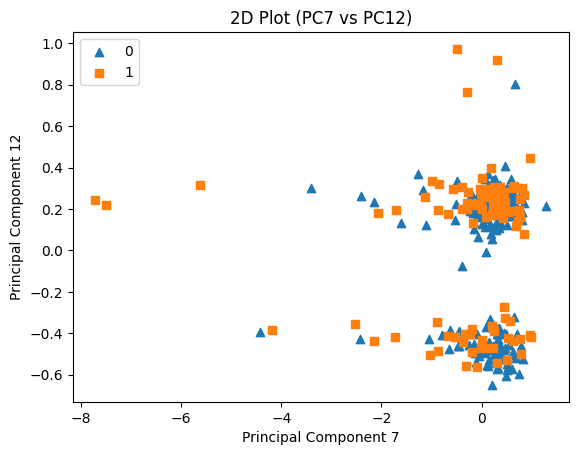

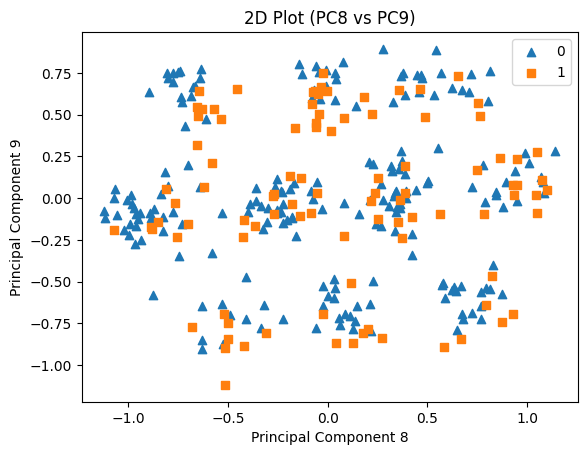

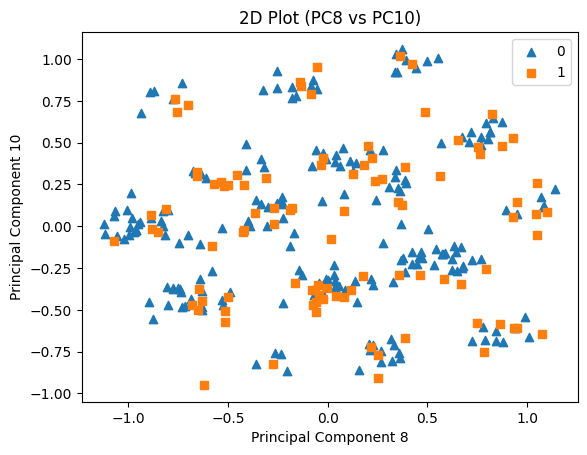

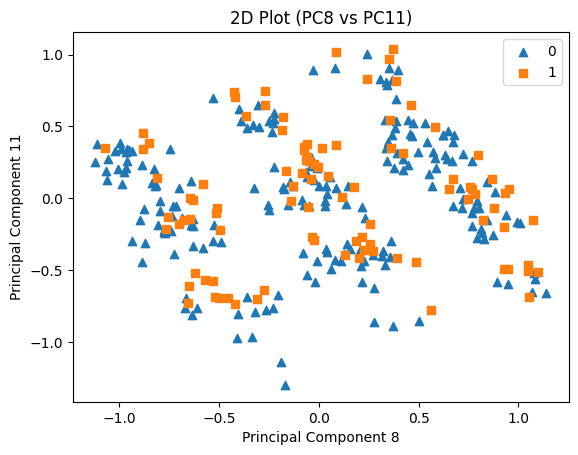

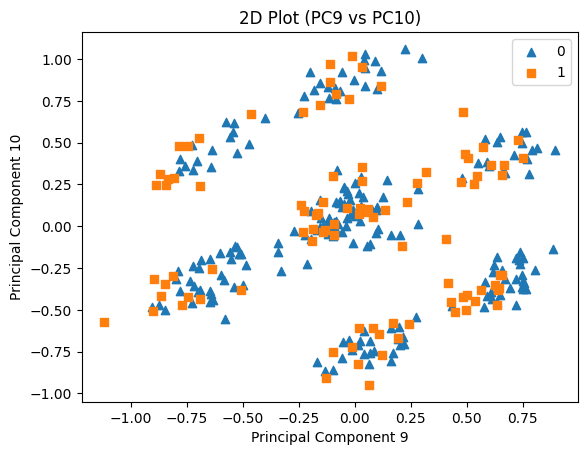

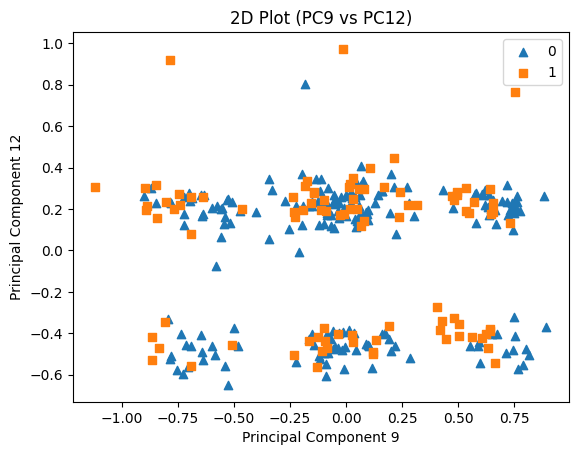

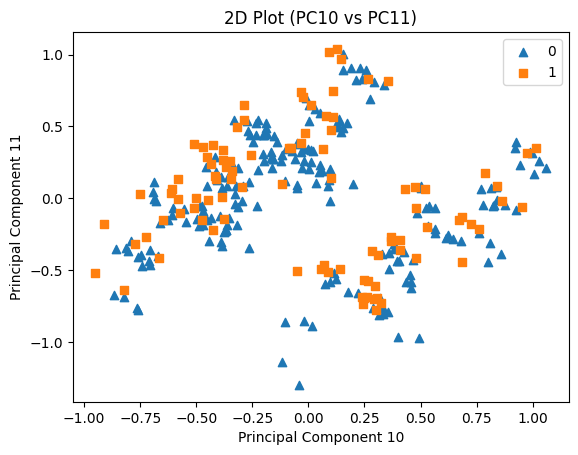

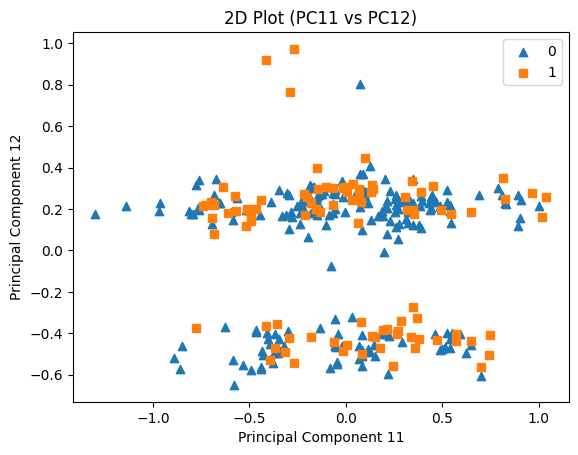

In [147]:
num_components = 12

# Creating an array of marker types
markers = ['^', 's']

target_labels = [0,1] 

# Arrays to store the figures
figures_3d = []

# 2D plots
for i in range(num_components - 1):
    for j in range(i + 1, num_components):
        fig = plt.figure()
        for k in range(len(np.unique(y))):
            plt.scatter(PCA[y == k, i], PCA[y == k, j],
                        marker=markers[k])
            plt.xlabel('Principal Component {}'.format(i + 1))
            plt.ylabel('Principal Component {}'.format(j + 1))
            plt.legend(target_labels)
            plt.title('2D Plot (PC{} vs PC{})'.format(i + 1, j + 1))


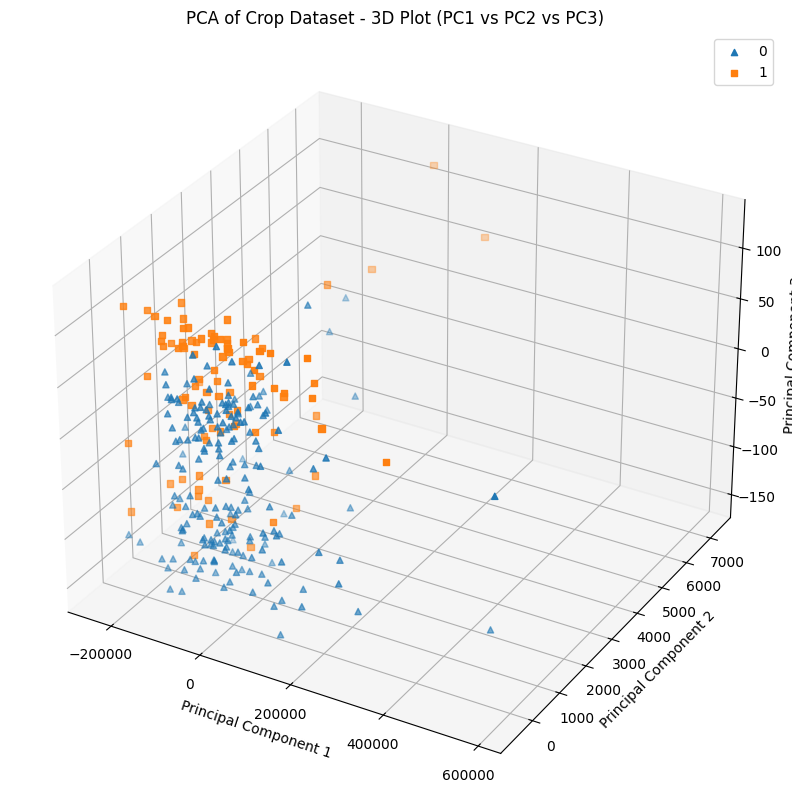

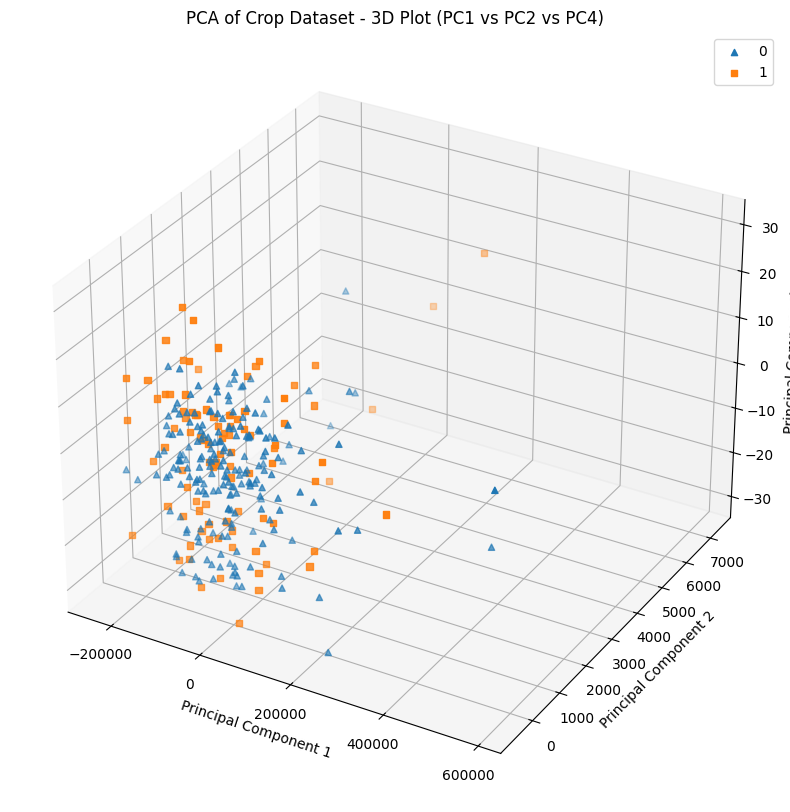

In [ ]:
figures_3d = []

# 3D plots
combinations = list(itertools.combinations(range(num_components), 3))

for i, j, k in combinations:
    fig = plt.figure(figsize=(16,10))
    ax = fig.add_subplot(111, projection='3d')
    for label in range(len(y.unique())):
        ax.scatter(PCA[y == label,i],PCA[y == label,j], PCA[y == label,k], marker = markers[label])
    ax.set_xlabel('Principal Component {}'.format(i + 1))
    ax.set_ylabel('Principal Component {}'.format(j + 1))
    ax.set_zlabel('Principal Component {}'.format(k + 1))
    ax.legend(target_labels)
    ax.set_title('PCA of Crop Dataset - 3D Plot (PC{} vs PC{} vs PC{})'.format(i + 1, j + 1, k + 1))
    # Append the figure to the 3D figures array
    figures_3d.append(fig)
    

for i, fig in enumerate(figures_3d):
    fig.savefig('3D_plot_{}.png'.format(i + 1))

# Display the figures
plt.show()
    